### Kita harus punya data 
Data yang akan digunakan adalah data anjing dan kucing
- https://drive.google.com/uc?id=1tgpOBLRzo3NEXUa2pE_pSLJvQk7lDizj
baru
- https://drive.google.com/file/d/1XP1luJyOV9220FGlLoye3X_ORtpVIISQ/view?usp=share_link

https://drive.google.com/drive/folders/1C5an4COXY42eAO6FnY0BEvo5PL-9sK-f?hl=id


In [ ]:
#download dataset dari google drive
!gdown 1XP1luJyOV9220FGlLoye3X_ORtpVIISQ

Downloading...
From: https://drive.google.com/uc?id=1XP1luJyOV9220FGlLoye3X_ORtpVIISQ
To: /content/Dataset.zip
100% 64.5M/64.5M [00:00<00:00, 112MB/s]


In [ ]:
import os #ini untuk exec operasi pada os colab
import zipfile # ini untuk extract zip file

#unzip dataset
zip_ref = zipfile.ZipFile("/content/Dataset.zip", "r") #bikin reference ke data
zip_ref.extractall("./") #extract data di current folder (/content)
zip_ref.close()

In [ ]:
# Menentukan nama direktori baru
nama_direktori = "dataset_terbagi"

# Membuat direktori baru
os.makedirs(nama_direktori, exist_ok=True)

In [ ]:
import random
from shutil import copyfile

# Path ke direktori gambar
gambar_dir = "/content/Dataset"
data_dir = "/content/dataset_terbagi"

# Nama-nama kelas gambar
kelas = ["Acne", "Flek Hitam", "Healty", "Rosacea", "panu"]

# Rasio pembagian data training dan data validasi
rasio_train = 0.8  # 80% data training
rasio_val = 0.2  # 20% data validasi

# Membuat direktori data training dan data validasi
train_dir = os.path.join(data_dir, "training")
val_dir = os.path.join(data_dir, "validation")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Memisahkan data untuk setiap kelas
for kelas_name in kelas:
    kelas_dir = os.path.join(gambar_dir, kelas_name)
    train_kelas_dir = os.path.join(train_dir, kelas_name)
    val_kelas_dir = os.path.join(val_dir, kelas_name)
    os.makedirs(train_kelas_dir, exist_ok=True)
    os.makedirs(val_kelas_dir, exist_ok=True)

    # Mengambil daftar gambar untuk kelas tersebut
    daftar_gambar = os.listdir(kelas_dir)

    # Mengacak urutan gambar
    random.shuffle(daftar_gambar)

    # Menghitung jumlah gambar untuk training dan validasi
    jumlah_gambar = len(daftar_gambar)
    jumlah_train = int(jumlah_gambar * rasio_train)
    jumlah_val = int(jumlah_gambar * rasio_val)

    # Memindahkan gambar ke direktori training
    for gambar_name in daftar_gambar[:jumlah_train]:
        src_path = os.path.join(kelas_dir, gambar_name)
        dst_path = os.path.join(train_kelas_dir, gambar_name)
        copyfile(src_path, dst_path)

    # Memindahkan gambar ke direktori validasi
    for gambar_name in daftar_gambar[jumlah_train:(jumlah_train + jumlah_val)]:
        src_path = os.path.join(kelas_dir, gambar_name)
        dst_path = os.path.join(val_kelas_dir, gambar_name)
        copyfile(src_path, dst_path)


In [ ]:
#setup path dan directory untuk datasetnya

train_dir = "/content/dataset_terbagi/training"
validation_dir =  "/content/dataset_terbagi/validation"


train_data_acne = os.listdir(train_dir + "/Acne/") #ambil semua nama file di dalam folder train_dir/cats
train_data_flek = os.listdir(train_dir + "/Flek Hitam/") 
train_data_healthy = os.listdir(train_dir + "/Healty/") 
train_data_rocasea = os.listdir(train_dir + "/Rosacea/") 
train_data_panu = os.listdir(train_dir + "/panu/") 

validation_data_acne = os.listdir(validation_dir + "/Acne/") 
validation_data_flek = os.listdir(validation_dir + "/Flek Hitam/") 
validation_data_healthy = os.listdir(validation_dir + "/Healty/") 
validation_data_rocasea = os.listdir(validation_dir + "/Rosacea/")
validation_data_panu = os.listdir(validation_dir + "/panu/") 

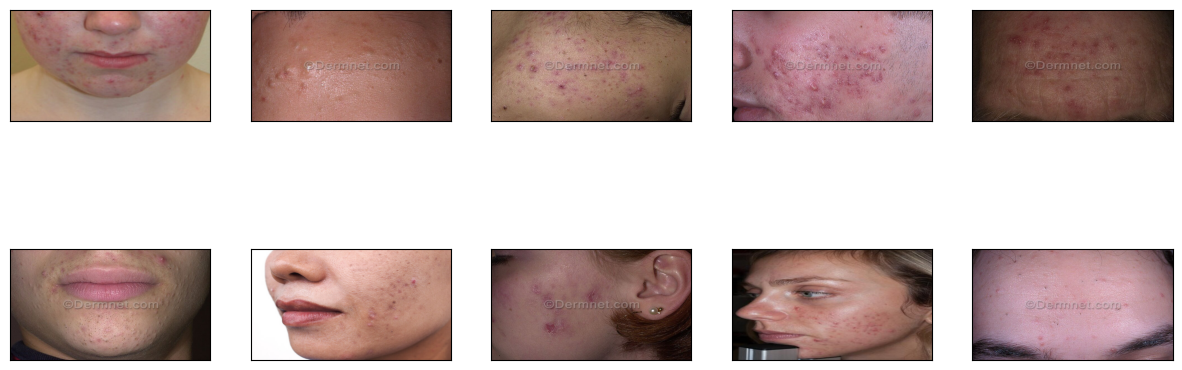

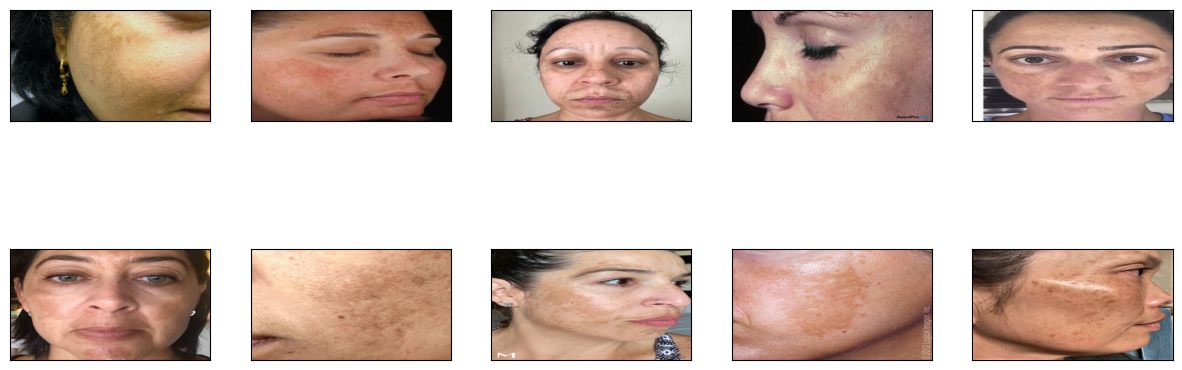

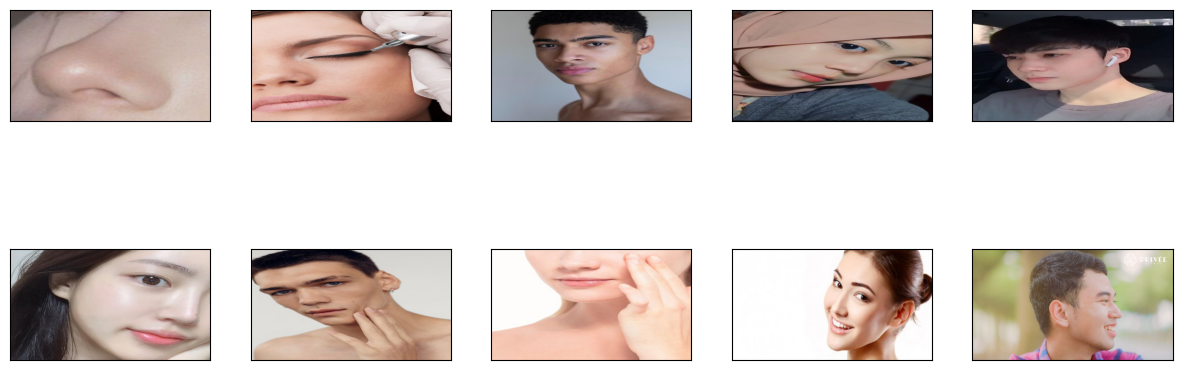

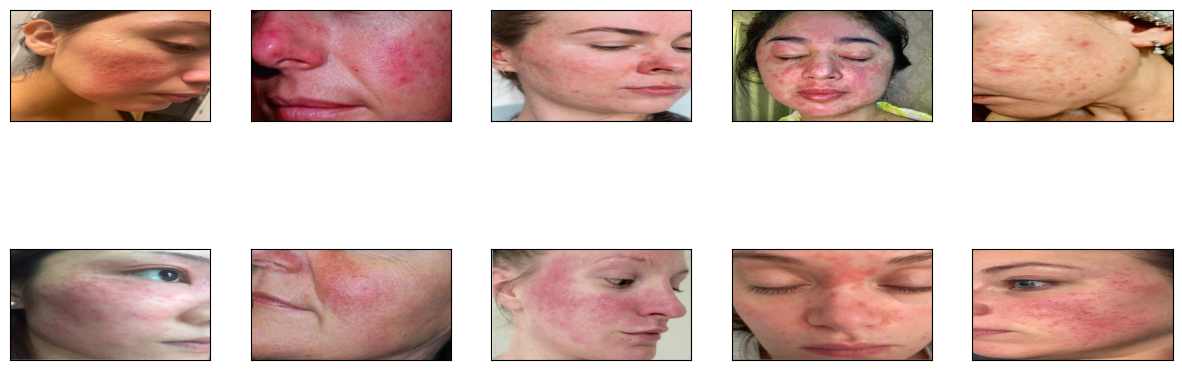

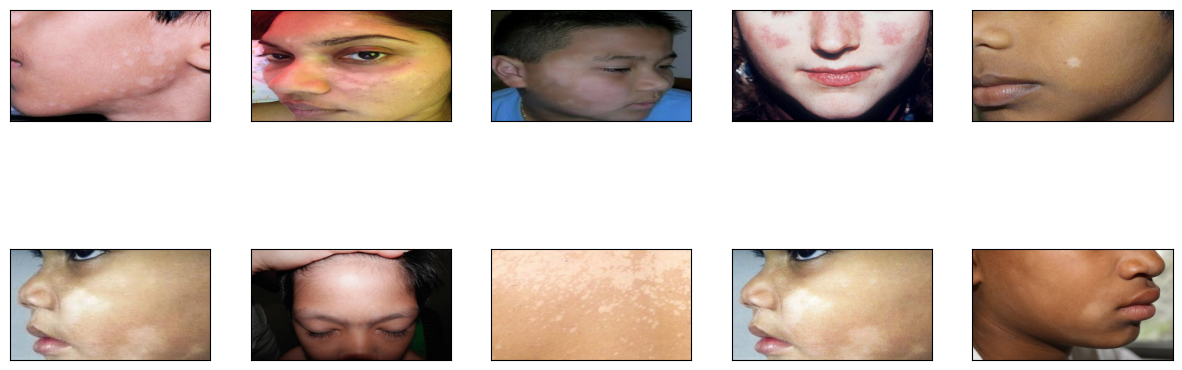

In [ ]:
#kita akan lihat dan cek sample data yang ada didalam dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Acne
plt.figure(figsize= (15,15))
for i in range(10):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  image = mpimg.imread(train_dir + "/Acne/" + train_data_acne[i])
  plt.imshow(image)
plt.show()

#Flek
plt.figure(figsize= (15,15))
for i in range(10):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  image = mpimg.imread(train_dir + "/Flek Hitam/" + train_data_flek[i])
  plt.imshow(image)
plt.show()

#Healthy
plt.figure(figsize= (15,15))
for i in range(10):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  image = mpimg.imread(train_dir + "/Healty/" + train_data_healthy[i])
  plt.imshow(image)
plt.show()

#Rocasea
plt.figure(figsize= (15,15))
for i in range(10):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  image = mpimg.imread(train_dir + "/Rosacea/" + train_data_rocasea[i])
  plt.imshow(image)
plt.show()

#Panu
plt.figure(figsize= (15,15))
for i in range(10):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  image = mpimg.imread(train_dir + "/panu/" + train_data_panu[i])
  plt.imshow(image)
plt.show()

### Preprocess Data
- dari folder dataset, kita bisa pakai image data generator untuk melakukan augmentasi sekaligus melabelkan image dengan label perfolder

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
train_dir = '/content/dataset_terbagi/training'
validation_dir = '/content/dataset_terbagi/validation'

# Menentukan ukuran gambar input dan batch size
input_shape = (224, 224, 3)
batch_size = 32

# Membuat objek ImageDataGenerator untuk augmentasi data
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [ ]:
# Membuat generator untuk data train dan validasi
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = input_shape[:2],
    batch_size = batch_size,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = input_shape[:2],
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

Found 998 images belonging to 5 classes.
Found 249 images belonging to 5 classes.


#Modelling
- karena kita gunakan pretrained model, maka base modelnya harus kita pilih dari pretrained yang akan dipakai

In [ ]:
#import pretrained model yang akan digunakan
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.utils import plot_model #ini tuh buat visualisasi model dan arsitekturnya


In [ ]:
selection = "MobileNetV2" #@param ["VGG16", "MobileNetV2", "ResNet50", "InceptionV3", "DenseNet121"]

if selection == "VGG16":
  base_model = VGG16(
      input_shape = (224,224,3), #channel RGB
      include_top = False, #kita gk pakai fully connected pretraine karna beda class nya/labelnya
      weights = "imagenet"
  )
elif selection =="MobileNetV2":
  base_model = MobileNetV2(
      input_shape = (224,224,3), #channel RGB
      include_top = False, #kita gk pakai fully connected pretraine karna beda class nya/labelnya
      weights = "imagenet"
  )
elif selection == "ResNet50":
  base_model = ResNet50(
      input_shape = (224,224,3), #channel RGB
      include_top = False, #kita gk pakai fully connected pretraine karna beda class nya/labelnya
      weights = "imagenet"
  )
elif selection == "DenseNet121":
  base_model = DenseNet121(
      input_shape = (224,224,3), #channel RGB
      include_top = False, #kita gk pakai fully connected pretraine karna beda class nya/labelnya
      weights = "imagenet"
  )
else :
  base_model = InceptionV3(
      input_shape = (224,224,3), #channel RGB
      include_top = False, #kita gk pakai fully connected pretraine karna beda class nya/labelnya
      weights = "imagenet"
  )

print(f"Base model yang digunakan adalah: {selection}")

#supaya layer basemodel tidak ditraining ulang dari awal/ditimpa
#maka kita ubah trainable layer pretrained menjadi false
for layer in base_model.layers:
  layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step
Base model yang digunakan adalah: MobileNetV2


In [ ]:
#Kita akan sesuaikan pretrained model dengan custom layer yang kita inginkan dan butuhkan

x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
#x = tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)#kernel_regularizer=tf.keras.regularizers.l2(0.01)
#x = tf.keras.layers.Dropout(0.15)(x)
x = tf.keras.layers.Dense(64, activation= "relu")(x)
x = tf.keras.layers.Dense(32, activation= "relu")(x)
x = tf.keras.layers.Dropout(0.1)(x) 
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs= base_model.input, outputs = outputs)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5,
    mode="auto",
    verbose=1,
    baseline=None,
    restore_best_weights=True
)

checkpoint_path = 'model_checkpoints/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weight_only=True,
    verbose=1
)

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0007)

model.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=100,
    callbacks = [early_stop, checkpoint],
    verbose=1,
    validation_data=validation_generator,
)

Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 0.4029 - accuracy: 0.8587
Epoch 1: val_loss did not improve from 0.45459
32/32 [==============================] - 23s 597ms/step - loss: 0.4029 - accuracy: 0.8587 - val_loss: 0.5892 - val_accuracy: 0.7831
Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 0.3896 - accuracy: 0.8677
Epoch 2: val_loss did not improve from 0.45459
32/32 [==============================] - 18s 563ms/step - loss: 0.3896 - accuracy: 0.8677 - val_loss: 0.5410 - val_accuracy: 0.8072
Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 0.3527 - accuracy: 0.8818
Epoch 3: val_loss did not improve from 0.45459
32/32 [==============================] - 19s 589ms/step - loss: 0.3527 - accuracy: 0.8818 - val_loss: 0.4837 - val_accuracy: 0.8153
Epoch 4/100
32/32 [==============================] - ETA: 0s - loss: 0.3215 - accuracy: 0.8888
Epoch 4: val_loss improved from 0.45459 to 0.40181, saving model to model_checkpoin

In [ ]:
# Mendapatkan akurasi dan loss dari history
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Menghitung persentase akurasi dan loss
train_accuracy_percent = train_accuracy * 100
val_accuracy_percent = val_accuracy * 100
train_loss_percent = train_loss * 100
val_loss_percent = val_loss * 100

# Menampilkan persentase akurasi dan loss
print("Train Accuracy: {:.2f}%".format(train_accuracy_percent))
print("Validation Accuracy: {:.2f}%".format(val_accuracy_percent))
print("Train Loss: {:.2f}%".format(train_loss_percent))
print("Validation Loss: {:.2f}%".format(val_loss_percent))

Train Accuracy: 93.99%
Validation Accuracy: 82.73%
Train Loss: 18.46%
Validation Loss: 52.05%


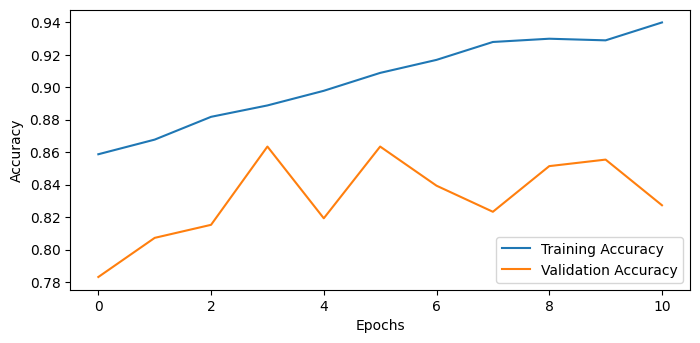

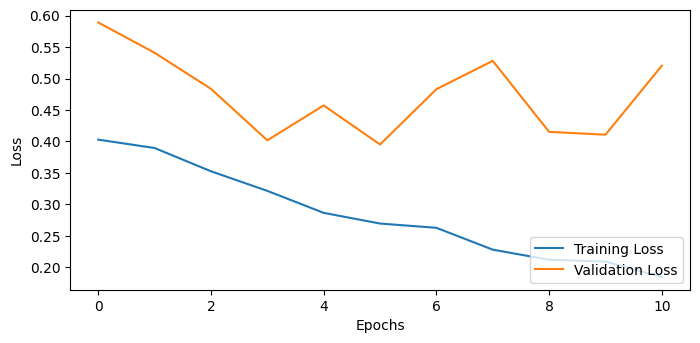

In [ ]:
#plot accuracy sama loss dari proses training

import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc, label= "Training Accuracy")
plt.plot(val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

plt.figure(figsize=(8,8))
plt.subplot(2,1,2)
plt.plot(loss, label= "Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend(loc = "lower right")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [ ]:
#buat prediction data yang didapat dengan memprediksikan data validation pada model
STEP_SIZE_TEST = validation_generator.n // validation_generator.batch_size #hitung step size data validation (rumusnya: jumlah data / batch size)
validation_generator.reset() #reset generator untuk menghapus recent data

preds = model.predict(validation_generator, verbose=1)

8/8 [==============================] - 4s 422ms/step


In [ ]:
print(validation_generator.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [ ]:
print(preds)

[[3.5768387e-01 6.4351591e-03 1.8151269e-03 6.1753553e-01 1.6530229e-02]
 [4.6482792e-01 6.8325695e-04 2.1608676e-01 1.0474802e-01 2.1365404e-01]
 [7.7740180e-01 3.6094920e-04 1.7421594e-03 2.1851060e-01 1.9844039e-03]
 ...
 [4.2550441e-02 6.0068852e-01 1.2445768e-02 2.1348536e-01 1.3082993e-01]
 [1.8992587e-05 1.1398601e-03 6.2581799e-03 1.6438807e-04 9.9241865e-01]
 [3.4363293e-05 1.1215310e-03 1.9243345e-01 1.0907090e-02 7.9550356e-01]]


In [ ]:
from sklearn.metrics import classification_report
import numpy as np
actual_lable = [np.argmax(x) for x in preds]

print(actual_lable)
len(actual_lable)

[3, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 0, 1, 1, 1, 4, 1, 1, 1, 4, 4, 3, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4]


249

In [ ]:
print(validation_generator.labels)
len(validation_generator.labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


249

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from keras.utils import to_categorical

# Ubah label kelas menjadi one-hot encoding
validation_labels = to_categorical(validation_generator.classes)

# Inisialisasi variabel untuk menyimpan hasil ROC AUC masing-masing kelas
roc_auc_scores = []

# Loop untuk menghitung ROC AUC untuk setiap kelas
for i in range(5):
    fpr, tpr, _ = roc_curve(validation_labels[:, i], preds[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

# Cetak hasil ROC AUC masing-masing kelas
for i in range(5):
    print(f"ROC AUC Class {i}: {roc_auc_scores[i]}")

ROC AUC Class 0: 0.992964824120603
ROC AUC Class 1: 0.9588944723618091
ROC AUC Class 2: 0.9882412060301508
ROC AUC Class 3: 0.9610050251256281
ROC AUC Class 4: 0.9708163265306122


In [ ]:

# Konversi hasil prediksi menjadi label kelas
classified_data = np.argmax(preds, axis=1)

# Cetak classification report
print("Classification Report")
print(classification_report(validation_generator.classes, actual_lable))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        50
           1       0.77      0.82      0.80        50
           2       0.92      0.94      0.93        50
           3       0.86      0.84      0.85        50
           4       0.84      0.86      0.85        49

    accuracy                           0.87       249
   macro avg       0.87      0.87      0.87       249
weighted avg       0.87      0.87      0.87       249



In [ ]:
print(validation_generator.class_indices)

{'Acne': 0, 'Flek Hitam': 1, 'Healty': 2, 'Rosacea': 3, 'panu': 4}


In [ ]:
from PIL import Image
import numpy as np
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    path = "/content/" + fn
    img = Image.open(path).resize((224, 224))
    x = np.array(img) / 255.0
    x = np.expand_dims(x, axis=0)
    classes = model.predict(x)
    predicted_class = np.argmax(classes)
    #print(np.argmax(classes))

    # Cetak hasil prediksi
    if predicted_class == 0:
        print("Terindikasi Berjerawat")
    elif predicted_class == 1:
        print("Terindikasi Flek Hitam")
    elif predicted_class == 2:
        print("Terindikasi Wajah Bersih")
    elif predicted_class == 3:
        print("Terindikasi Rocasea")
    elif predicted_class == 4:
        print("Terindikasi Berpanu")


Saving WhatsApp Image 2023-05-19 at 9.33.14 PM (1).jpeg to WhatsApp Image 2023-05-19 at 9.33.14 PM (1).jpeg
1/1 [==============================] - 0s 22ms/step
Terindikasi Berjerawat


In [ ]:
model.save_weights("model-mobilenetv2-kulitwajah.h5")